# TIME-SERIES ANALYSIS ON AIRPASSENGER DATASET

In [1]:
import pandas as pd
A=pd.read_csv('E:/Dataset/airpassenger.csv')

In [2]:
A.head()

,1949-01,112
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [3]:
#to give column names
A=pd.read_csv('E:/Dataset/airpassenger.csv',names=['year','passengers'])

In [4]:
A.head()

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
#to convert into correct data format
A.year=pd.to_datetime(A.year,format="%Y-%m")

In [6]:
A.index=A.year#time should not be a specific column,it should be an index

In [7]:
A=A.drop(labels="year",axis=1)

In [8]:
A

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


# Visualise Original Time-Series

In [9]:
import matplotlib.pyplot as plt

Text(0,0.5,'No. of Passengers')

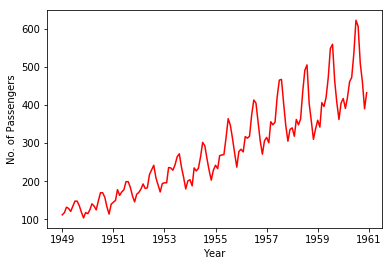

In [10]:
#Visualise the airpassenger dataset
plt.plot(A,c='red')
plt.xlabel('Year')
plt.ylabel('No. of Passengers')

# To visualise the components of time-series

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


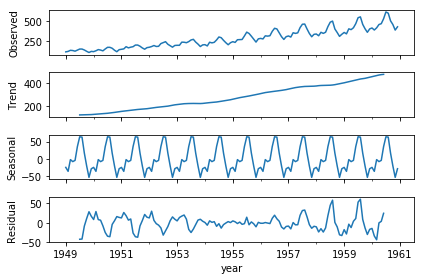

In [11]:
from statsmodels.api import tsa
tsa.seasonal_decompose(A).plot()
plt.show()

# Standardization of Time-Series

In [12]:
#standartisation using Log
import numpy as np
LOGGED_DF=pd.DataFrame(np.log(A['passengers']))

Text(0,0.5,'No. of passengers')

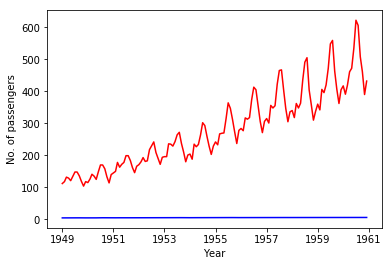

In [13]:
#Comparing original time-series and Standardise time-series
plt.plot(A,c='red')
plt.plot(LOGGED_DF,c='blue')
plt.xlabel("Year")
plt.ylabel('No. of passengers')

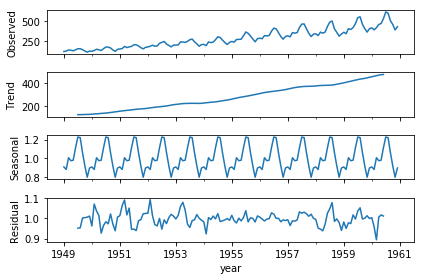

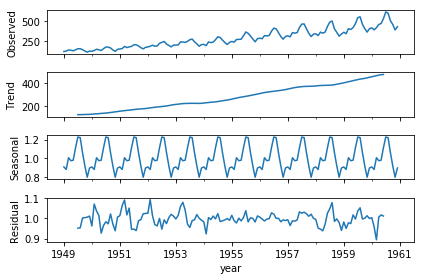

In [14]:
#Decompose Time-Series based on seasons
import statsmodels.api as sm
sm.tsa.seasonal_decompose(A,model='multiplicative').plot()

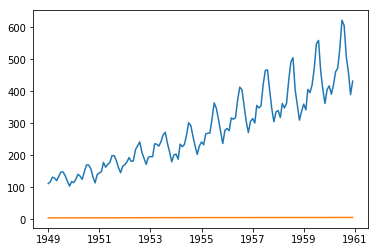

In [15]:
plt.plot(A)
plt.plot(LOGGED_DF)

# To check whether data has been converted to stationary using rolling mean

# Comparing original time-series rolling mean and standardise rolling mean

In [16]:
rm=A.rolling(window=12).mean()
rstd=A.rolling(window=12).std()

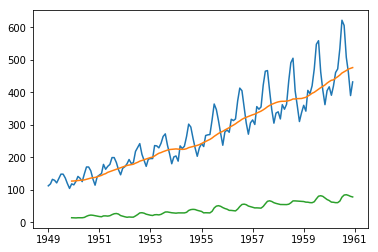

In [17]:
plt.plot(A)
plt.plot(rm)
plt.plot(rstd)

In [18]:
rm=LOGGED_DF.rolling(window=12).mean()
rstd=LOGGED_DF.rolling(window=12).std()

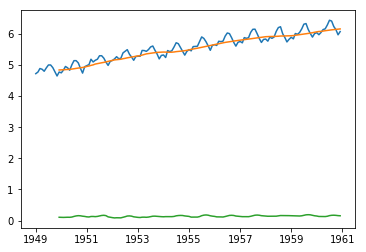

In [19]:
plt.plot(LOGGED_DF)
plt.plot(rm)
plt.plot(rstd)

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [21]:
#Improving rolling mean using better standardisation than log that is Z-score
STD_DF=pd.DataFrame(ss.fit_transform(A[['passengers']]),columns=['passengers'],index=A.index)

In [22]:
rm=STD_DF.rolling(window=12).mean()
rstds=STD_DF.rolling(window=12).std()

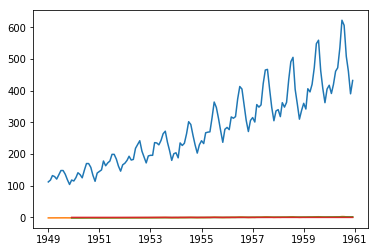

In [23]:
plt.plot(A)
plt.plot(STD_DF)
plt.plot(rm)
plt.plot(rstd)

In [24]:
#Numeric way of testing using p-value
from statsmodels.tsa import adfvalues

In [25]:
from statsmodels.tsa.stattools import adfuller
adfuller(A['passengers'])[1]

0.991880243437641

In [26]:
from statsmodels.tsa.stattools import adfuller
adfuller(LOGGED_DF['passengers'])[1]

0.42236677477039075

In [27]:
from statsmodels.tsa.stattools import adfuller
adfuller(STD_DF['passengers'])[1]

0.9918802434376411

In [28]:
#Difference of log and mean
rm=A.rolling(window=12).mean()
W=np.log(A)-rm
W=W[W['passengers'].isna()!=True]#To remove null values

In [29]:
from statsmodels.tsa.stattools import adfuller
adfuller(W['passengers'])[1]

0.9921114303164104

In [30]:
#According to adfuller test none of standardization are stationary

In [31]:
Q=np.log(A)-rm
adfuller(W['passengers'])[1]

0.9921114303164104

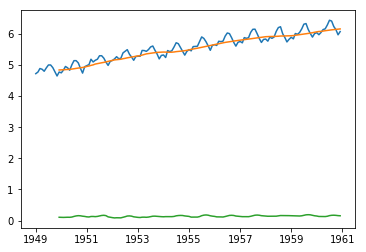

In [32]:
import numpy as np
Alog = np.log(A)

rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviatation

plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

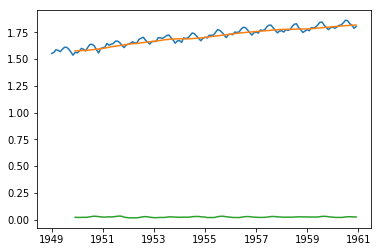

In [33]:
import numpy as np
Alog = np.log(np.log(A))

rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviatation

plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaledA = pd.DataFrame(ss.fit_transform(A),index=A.index,columns=A.columns)

rm = scaledA.rolling(window=12).mean() #rolling mean
rstd = scaledA.rolling(window=12).std() #rolling standard deviatation

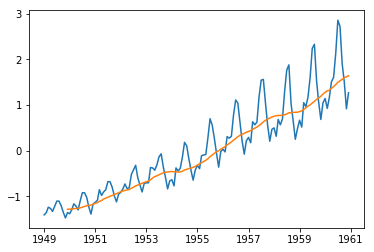

In [34]:
plt.plot(scaledA)
plt.plot(rm)
#plt.plot(rstd)

In [35]:
from statsmodels.tsa.stattools import adfuller
q = adfuller(Alog.passengers)
pval = q[1]
pval

0.222589891170617

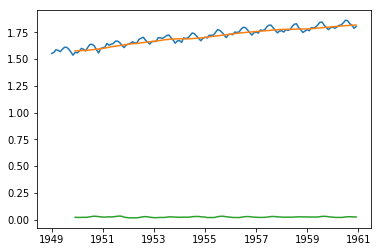

In [36]:
import numpy as np
Alog = np.log(np.log(A))

rm = Alog.rolling(window=12).mean() #rolling mean
rstd = Alog.rolling(window=12).std() #rolling standard deviatation


plt.plot(Alog)
plt.plot(rm)
plt.plot(rstd)

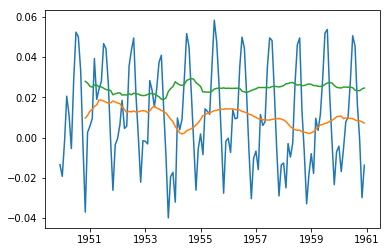

In [37]:
q = Alog-rm

import numpy as np


rm = q.rolling(window=12).mean() #rolling mean
rstd = q.rolling(window=12).std() #rolling standard deviatation


plt.plot(q)
plt.plot(rm)
plt.plot(rstd)

In [38]:
adfuller(q.passengers[~q.passengers.isna()])[1]

0.040441346457424386

In [39]:
A.shape

(144, 1)

In [40]:
A.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='year', length=144, freq=None)

In [41]:
Forecasting using AR Model

SyntaxError: invalid syntax (<ipython-input-41-365893d7bcb1>, line 1)

In [42]:
trd = A[A.index.year<=1958]
tsd = A[A.index.year>1958]

In [43]:
trd

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [44]:
tsd

,passengers
year,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


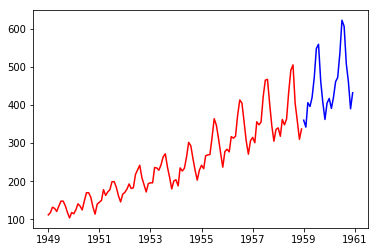

In [45]:
plt.plot(trd,c="red")
plt.plot(tsd,c="blue")

In [46]:
trd = A[A.index.year<=1958]
tsd = A[A.index.year>1958]

from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start="1959-01-01",end="1960-12-01")
tsd['Forecasted_from_AR']=pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [47]:
from sklearn.metrics import mean_squared_error
print("MSE = %.2f"%mean_squared_error(tsd.passengers,tsd.Forecasted_from_AR))

MSE = 1814.01


In [48]:
tsd

,passengers,Forecasted_from_AR
year,,
1959-01-01,360,346.387361
1959-02-01,342,320.446670
1959-03-01,406,370.614512
1959-04-01,396,350.715553
1959-05-01,420,381.196946
1959-06-01,472,464.228410
1959-07-01,548,530.961303
1959-08-01,559,546.633624
1959-09-01,463,433.801565


In [49]:
trd = A[A.index.year<=1958]
tsd = A[A.index.year>1958]

In [50]:
trd

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [54]:
trd = A[A.index.year<=1958]
tsd = A[A.index.year>1958]

A = A.astype('float32')

from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(trd,order=(1,0,1)).fit()
pred = model_arima.predict(start="1959-01-01",end="1960-12-01")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [55]:
tsd['Forecasted_from_ARIMA']=pred

In [56]:
from sklearn.metrics import mean_squared_error
print("MSE = %.2f"%mean_squared_error(tsd.passengers,tsd.Forecasted_from_ARIMA))

MSE = 32990.57


In [57]:
tsd

,passengers,Forecasted_from_ARIMA
year,,
1959-01-01,360.0,350.205354
1959-02-01,342.0,342.242807
1959-03-01,406.0,334.876262
1959-04-01,396.0,328.061106
1959-05-01,420.0,321.756069
1959-06-01,472.0,315.922967
1959-07-01,548.0,310.526475
1959-08-01,559.0,305.533914
1959-09-01,463.0,300.915049
